# Midterm YourUserID: xxxxxxxx
## Preliminaries

In [2]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np

## Task 1: The relation between smoking and premature birth
### Question 1 (8 pt) 
Generate a contingency table of whether the mother is a smoker and whether the birth is premature. Calculate and report (in a full sentence) the conditional probabilities of having a premature birth given that the woman is either a smoker and a non-smoker. Generate a plot that lets you compare these relative proportions directly. 

In [3]:
D = pd.read_csv('births.csv')

In [4]:
T = pd.crosstab(D.smoke,D.premature)
T

premature,full term,premie
smoke,,
nonsmoker,87,13
smoker,42,8


In [5]:
P=T.div(T.sum(1),axis=0)
P

premature,full term,premie
smoke,,
nonsmoker,0.87,0.13
smoker,0.84,0.16


non-smokers have a 13% probability in this sample to give premature birth - smokers exhibit a 16% probability

Text(0,0.5,'proportion')

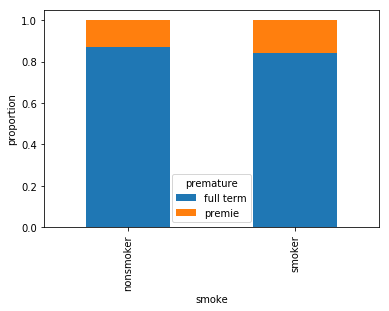

In [6]:
P.plot(kind='bar',stacked=True)
plt.ylabel('proportion')

### Question 2 (8pt)
We want to test the idea that smoking has some effect on the risk of premature birth. Written answer: Formulate the null- and alternative hypothesis. Calculate and report the appropriate Chi-square test-statistic.   

The Null hypothesis is that smoking habits and the risk of premature birth are independent. The alternative hypothesis is that smoking either increases or decreases the risk of premature birth. 

In [7]:
def calcX2(D):
    observed = pd.crosstab(D.smoke,D.premature)
    expected = np.outer(observed.sum(axis=1), observed.sum()) / np.sum(np.sum(observed))
    return sum(sum((observed.as_matrix()-expected)**2/expected))

calcX2(D)
observed = pd.crosstab(D.smoke,D.premature)
chi,p,dof,expect = ss.chi2_contingency(observed)


The Chi-square value it X2=0.249. 

Note that the function scipy.stats.chi2_contigency gives a result of 0.062. This is because this function applies a additional correction for the case that DOF = 1 (Yates correction for continuity). Note that this correction is NOT documented in the scipy webpage. We won't subtract points for using the scipy.stats function, as it was not clearly stated, but for future homework and final, please use the functions written in class

### Question 3 (8pt)
To indicate whether this Chi-square value indicates a significant effect, can you use the Chi-square approximation? Check explicitly whether the necessary condition (all expected counts > 4) is met.   

In [8]:
observed = pd.crosstab(D.smoke,D.premature)
expected = np.outer(observed.sum(axis=1), observed.sum()) / np.sum(np.sum(observed))
expected

array([[ 86.,  14.],
       [ 43.,   7.]])

The smallest expected count in the table in 7 - therefore we can use the Chi-square approximation. 

### Question 4 (8pt)
How many degrees of freedom does the Chi-square statistics that you calculated have? Determine and report the p-value for the Chi-square value that you calculated. What do you conclude from this result? 
Note: The Chi-square distribution is called ss.chi2 in SciPy, not ss.chisquare as indicated in the last slide of lecture 6.

The Chi-square test has 1 df, as we have two rows and two columns in the table

In [9]:
1-ss.chi2.cdf(0.249,1)

0.61778008994523759

The p-value is 0.618. Therefore we cannot reject the Null-hypothesis that smoking habit does not influence the risk of having a premature birth. 

## Task 2: Does smoking influence the birth weight? 
### Question 1 (8pt)
Calculate and report the mean birth weight of babies born by smoking and by non-smoking moms. Generate a boxplot of birth weight, with separate boxes for smokers and non-smokers. Make sure that the two boxes are plotted in the same graph, so the two groups can be directly compared. Written answer: What do you observe in terms of means and median for the two groups? Is the distribution symmetric, left-skewed, or right-skewed? 

In [10]:
D.weight.groupby(D.smoke).mean()

smoke
nonsmoker    7.1882
smoker       6.7166
Name: weight, dtype: float64

/Users/nedarostamzadeh/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'weight(pounds)')

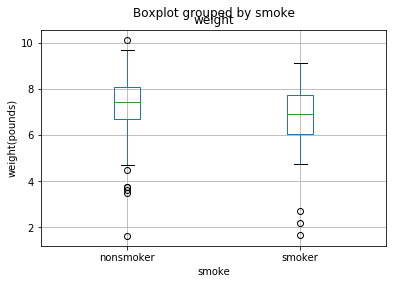

In [11]:
D.boxplot(column="weight",by="smoke")
plt.ylabel('weight(pounds)')

The mean birth weight for non-smokers is more than 0.4pounds larger than for smokers. The median birth weight for babies of non-smoking moms is also higher than for smokers. The distribution is moderately left-skewed with some babies being born with very low weight - these are likely the premature birth. 

### Question 2 (10pt)
As a researcher, you want to test the idea that smoking during pregnancy has some influence on the baby's birthweight. Formulate Null- and Alternative hypothesis (using =, >, <, and unequal signs). Write a function that returns the difference of the average birth weights between babies of smoker and non-smokers. Use a randomization test to test whether (and with what Type-I error) you can reject the Null-hypothesis. Written answer: What is your conclusion? 

Null Hypothesis: Birthweight (smoker) = Birthweight (non-smoker)
Alt. Hypothesis: Birthweight (smoker) unequal Birthweight (non-smoker)

In [12]:
def calcMeanDiff(D):
    a=D.weight.groupby(D.smoke).mean()
    return a[1]-a[0]

def performPermutation(D,fcn,numIterations=500,sides=1):    
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data 
        S=D.copy()                    # Make copy of the data frame
        x = np.array(range(len(D.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself! 
        y = S.smoke.iloc[x]   # copy the newly reorded values into a new Series  
        y = y.reset_index(drop=True)   #reoder the indices 
        S.smoke=y           # Copy back into the data frame
        
        #2. Calculate test statistics 
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic 
    realTS = fcn(D)

    # 4. Plot a histogram of the 
    plt.hist(listOfTS,bins=10)
    plt.axvline(x=realTS, color='k')
    
    # 5. determine p-value (one sided)
    if sides==1: 
        p=sum(listOfTS<=realTS)/len(listOfTS)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=np.absolute(realTS))/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    return p

 P-value of the randomisation test is p=  0.066


0.066000000000000003

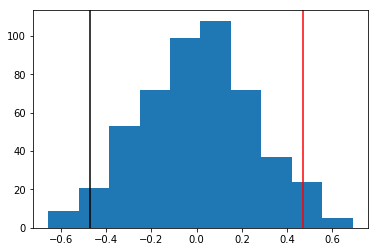

In [13]:
performPermutation(D,calcMeanDiff,sides=2)

Based on the data, we cannot reject the Null-hypothesis that there are no true differences in birth weight of smokers and non-smokers.  

### Question 3 (8pt)
You want to test the directed hypothesis that smoking is associated with a lower birth rate. Again, formulate Null and Alternative hypothesis. Use again a randomization test to see if you have evidence to reject the Null. Written answer: what is your conclusion? 

Null Hypothesis: Birthweight (smoker) >= Birthweight (non-smoker)
Alt. Hypothesis: Birthweight (smoker) < Birthweight (non-smoker)

0.034000000000000002

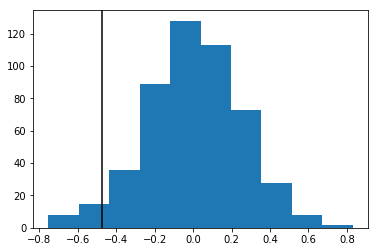

In [14]:
performPermutation(D,calcMeanDiff,sides=1)

Based on a one-sided test for the directed hypothesis we can reject the hypothesis that the birth weight of babies of smokers have higher or equal birth weight to babies of non-smokers. This means there is likely a real association between smoking and lower birth rate, as this drop (or a larger drop) in weight has only a probability of less than 5% to occurr by chance. 

### Question 4 (8pt)
Determine and report the approximate standard error of the mean difference in birth weight under the Null hypothesis (birth weights for smokers and non-smokers are equal) directly from the samples of the randomization test performed in Question 2 and 3. 

In [15]:
def performPermutation(D,fcn,numIterations=500):    
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data 
        S=D.copy()                    # Make copy of the data frame
        x = np.array(range(len(D.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself! 
        y = S.smoke.iloc[x]   # copy the newly reorded values into a new Series  
        y = y.reset_index(drop=True)   #reoder the indices 
        S.smoke=y           # Copy back into the data frame
        
        #2. Calculate test statistics 
        listOfTS[i] = fcn(S)

    # 3. Caluclate the standard error of the test statistic - 
    # i.e. the standard deviation of the mean difference under the H0 simulation 
    return np.std(listOfTS)

performPermutation(D,calcMeanDiff)

0.24834885985451977

### Question 5 (8pt)
Using this value as a standard error under the null-hypothesis, use the normal approximation to determine the p-value for testing the two hypotheses outlined in Question 3. Written answer: Is the answer consistent with the answer you got directly from the randomization test?

Under the Null-hypothesis, the mean difference in birth weight is 0. With a standard deviation of the SD = 0.25979, we can now use the normal approximation to determine the p-value for a difference of -0.4716. It is a one-sided test and we are only interested in the left tail (values smaller than -0.4716), so the normal approximation is caluculated as: 

In [16]:
ss.norm.cdf(-0.4716,0,0.25979)

0.034737959719757378

The normal approximation therefore gives us a p-value of 0.034. We would therefore also reject the null-hypthesis of equal birth weights. 

## TASK 3: Bayesian inference on average differences in birth weights 
### Question 1 (10pt)
An average drop of birthweight of 0.5lbs is considered to be clinically significant risk. Use a Bayesian hypothesis test to determine how strong the evidence is that smoking is associated with a clinically significant reduction in birth weight. Based on the distribution of the mean difference from the permutation test in Task 2, you decide that it is appropriate to use a normal approximation for the average weight difference, both under the H1 and H0. Further, assume the standard error of the mean difference of 0.25 both for the H1 and the H0. Calculate the probability density for the real mean difference under H1 and H0. Then calculate and report the Bayes Factor of the H1 over the H0. What can you conclude from this result?  

In [17]:
se=0.25 # Standard error of mean difference 
m=calcMeanDiff(D) #Mean difference 
p0 = ss.norm.pdf(m,0,se) # Probability of data under the H0 
p1 = ss.norm.pdf(m,-0.5,se) # Probability of the data under the H1 
BF = p1/p0  # Bayes factor 
BF

5.887314786034251

The Bayes factor of 5.88 indicates positive (but not strong) evidence that smoking is associated with a reduction of birth weight of 0.5kg. 

### Question 2 (8pt)
What is the posterior probability of the H1, assuming that a-priori you had the belief that there was a 70% chance that smoking may reduce the birth weight by 0.5lb. Show clearly the formula used to calculate the posterior probability. Written answer: What is the meaning of this posterior probability? How does the meaning differ from the p-value calculated under Task 2, Question 3? 

In [18]:
prior1 = 0.7 
prior0 = 0.3 
posterior1 = prior1*p1/(prior1*p1+prior0*p0)
posterior1

0.93214389651600371

The posterior probability of the hypothesis that smoking is associated with a 0.5lb reduction in birthweight is 93.2%. In general, the  posterior probability is p(H1|data). Specifically, it measures our subjective belief that the H1 (rather than H0) is true, based on the fact that our prior belief (before seeing this data) was 70%. Thus, the evidence has increased our confidence in the H1 by 12%. 

In contrast, the p-value is the probability that we had rejected the H0, assuming the H0 is true - p(reject H0|0). While low p-values can be taken as a sign of evidence that the H1 may be true, they do NOT indicate anything about the probability of the H1 being true. 

### Question 3 (8pt)
A news outlet picks up your result, saying that "the study shows that smoking among US women causes an average decrease in birth weight of 0.4lbs." Can you draw this conclusion from the data? What are two possible problems with such claim?

The first problem that the the newspaper claims that the results holds for US women in general. The sample is a random sample from North Carolina, rather than a random sample from the whole US population. Because it is unlikely that the relationship between smoking and birthweight depends on the geographic location (although not impossible!), this is probably the less serious problem. 
The second problem is that the newspaper makes a causal claim. Because the study is an observational study , other factor such as diet, socio-economic status, stress, etc, may have co-varied with smoking and therefore may have causes some or all of the effect on birth weight. 